In [ ]:
import numpy as np
#!pip install numpy
from tensorflow.keras.utils import to_categorical
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import cv2

def mirror_augmentation(image):
    # Initialize an array to store augmented images
    augmented_images = []

    # Original Image
    augmented_images.append(image)

    # Mirror horizontally
    horizontal_mirror = cv2.flip(image, 1)
    augmented_images.append(horizontal_mirror)

    # Mirror vertically
    vertical_mirror = cv2.flip(image, 0)
    augmented_images.append(vertical_mirror)

    # Mirror both horizontally and vertically (diagonal flip)
    diagonal_mirror = cv2.flip(image, -1)
    augmented_images.append(diagonal_mirror)

    return augmented_images

# Path to the folder containing images
#folder_path = "/content/drive/MyDrive/dataset/not_damaged"
folder_path = "/content/drive/MyDrive/dataset/slightly_damaged"


# Output folder for augmented images
#output_folder = "/content/drive/MyDrive/dataset/not_damaged"
output_folder = "/content/drive/MyDrive/dataset/slightly_damaged"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # Check if the image is loaded successfully
        if image is not None:
            # Perform augmentation
            augmented_images = mirror_augmentation(image)

            # Save augmented images
            base_name = os.path.splitext(filename)[0]
            for idx, augmented_image in enumerate(augmented_images):
                output_path = os.path.join(output_folder, f"{base_name}_augmented_{idx}.jpg")
                cv2.imwrite(output_path, augmented_image)
        else:
            print(f"Error: Unable to read {filename}")

print("Augmentation completed.")"""

'import os\nimport cv2\n\ndef mirror_augmentation(image):\n    # Initialize an array to store augmented images\n    augmented_images = []\n\n    # Original Image\n    augmented_images.append(image)\n\n    # Mirror horizontally\n    horizontal_mirror = cv2.flip(image, 1)\n    augmented_images.append(horizontal_mirror)\n\n    # Mirror vertically\n    vertical_mirror = cv2.flip(image, 0)\n    augmented_images.append(vertical_mirror)\n\n    # Mirror both horizontally and vertically (diagonal flip)\n    diagonal_mirror = cv2.flip(image, -1)\n    augmented_images.append(diagonal_mirror)\n\n    return augmented_images\n\n# Path to the folder containing images\n#folder_path = "/content/drive/MyDrive/dataset/not_damaged"\nfolder_path = "/content/drive/MyDrive/dataset/slightly_damaged"\n\n\n# Output folder for augmented images\n#output_folder = "/content/drive/MyDrive/dataset/not_damaged"\noutput_folder = "/content/drive/MyDrive/dataset/slightly_damaged"\n\n# Create the output folder if it doesn

In [ ]:
import os
import numpy as np
from PIL import Image

# Define the Dataset Directory
dataset_dir = "/content/drive/MyDrive/dataset/"

# List to store image paths and corresponding labels
image_paths = []
labels = []

# Iterate through each class folder
for class_label in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_label)

    # Iterate through each image in the class folder
    for image_name in os.listdir(class_dir):
        # Read image path
        image_path = os.path.join(class_dir, image_name)

        # Open and preprocess image
        image = Image.open(image_path)
        # Perform preprocessing (e.g., resize, normalize)
        # image = image.resize((desired_width, desired_height))
        # image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]

        # Append image path and label to lists
        image_paths.append(image_path)
        labels.append(class_label)  # Assuming class labels are folder names

# Convert labels to numeric format (e.g., using LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Convert image paths to NumPy array (optional)
X = np.array(image_paths)

# Sanity check: print number of images and labels
print("Number of Images:", len(X))
print("Number of Labels:", len(y))

Number of Images: 3929
Number of Labels: 3929


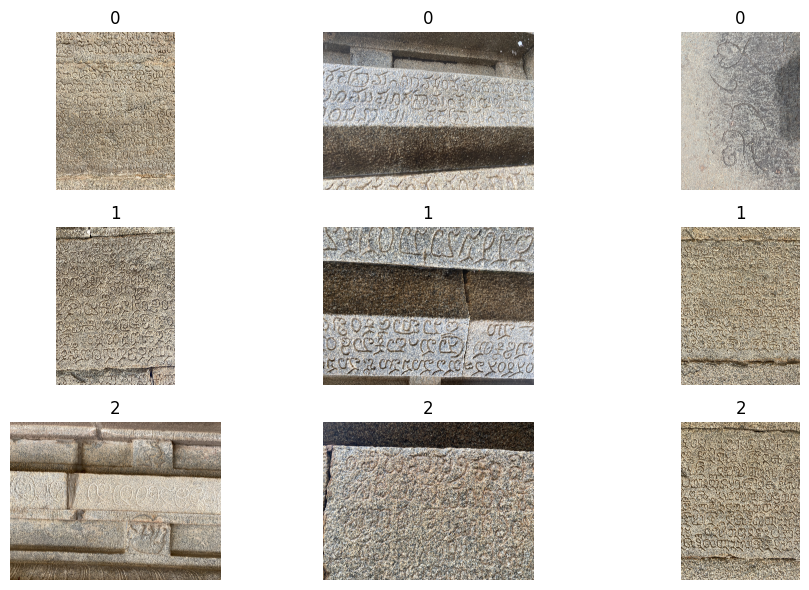

In [ ]:
# Define the number of samples to visualize per class
num_samples_per_class = 3

# Visualize a few images from each class
fig, axes = plt.subplots(len(np.unique(y)), num_samples_per_class, figsize=(10, 6))

for i, class_label in enumerate(np.unique(y)):
    class_indices = np.where(y == class_label)[0]
    sampled_indices = np.random.choice(class_indices, size=num_samples_per_class, replace=False)

    for j, idx in enumerate(sampled_indices):
        image_path = X[idx]  # Get image path from X
        image = Image.open(image_path)
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        axes[i, j].set_title(class_label)

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Define desired image dimensions
image_width, image_height = 150, 150
s
# Preprocess images
X_images_processed = []
for image_path in image_paths:
    image = Image.open(image_path)
    image = image.resize((image_width, image_height))  # Resize image
    image_array = img_to_array(image)  # Convert image to array
    image_array /= 255.0  # Normalize pixel values to [0, 1]
    X_images_processed.append(image_array)

X_processed = np.array(X_images_processed)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 classes for classification
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
89/89 [==============================] - 108s 1s/step - loss: 0.7609 - accuracy: 0.7571 - val_loss: 0.6163 - val_accuracy: 0.8000
Epoch 2/500
89/89 [==============================] - 110s 1s/step - loss: 0.6424 - accuracy: 0.7822 - val_loss: 0.5570 - val_accuracy: 0.8254
Epoch 3/500
89/89 [==============================] - 112s 1s/step - loss: 0.5836 - accuracy: 0.8034 - val_loss: 0.4648 - val_accuracy: 0.8381
Epoch 4/500
89/89 [==============================] - 112s 1s/step - loss: 0.4961 - accuracy: 0.8232 - val_loss: 0.4887 - val_accuracy: 0.8444
Epoch 5/500
89/89 [==============================] - 111s 1s/step - loss: 0.4174 - accuracy: 0.8487 - val_loss: 0.3997 - val_accuracy: 0.8444
Epoch 6/500
89/89 [==============================] - 108s 1s/step - loss: 0.3415 - accuracy: 0.8745 - val_loss: 0.4303 - val_accuracy: 0.8540
Epoch 7/500
89/89 [==============================] - 107s 1s/step - loss: 0.2998 - accuracy: 0.8876 - val_loss: 0.3990 - val_accuracy: 0.8984
Epoch 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

NameError: name 'model' is not defined

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
# Visualize training history (loss and accuracy over epochs)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Make predictions on the testing set
predictions = model.predict(X_test)

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    plt.title("Predicted: {}, Actual: {}".format(np.argmax(predictions[i]), y_test[i]))
    plt.axis('off')
plt.show()